In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# map drive to retrieve datasets
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [3]:
# map drive to retrieve datasets
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [4]:
# import dataset
law_inc_df = pd.read_csv('/content/Drive/MyDrive/Final_Project/segment_2_machine_learning/Cleaning_ML/law_inc_df.csv')
law_inc_df.head()

,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,violent,violenth,...,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal,deaths,injuries,state_year,deaths_above_below_mean
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,10,3,9,Alabama_2013,below_national_mean
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,8,8,16,Arizona_2013,below_national_mean
2,1,1,0,1,0,0,1,0,1,1,...,1,1,1,1,1,99,46,139,California_2013,below_national_mean
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,30,4,9,Colorado_2013,below_national_mean
4,1,1,1,1,1,0,0,1,1,1,...,0,0,0,0,1,82,2,13,Connecticut_2013,below_national_mean


**Preprocessing the Data for a Neural Network**

In [5]:
# determine data values
law_inc_df.dtypes

felony                      int64
invcommitment               int64
invoutpatient               int64
danger                      int64
drugmisdemeanor             int64
                            ...  
lawtotal                    int64
deaths                      int64
injuries                    int64
state_year                 object
deaths_above_below_mean    object
Length: 139, dtype: object

In [6]:
# retrieve list of columns
law_inc_df.columns.tolist()

['felony',
 'invcommitment',
 'invoutpatient',
 'danger',
 'drugmisdemeanor',
 'alctreatment',
 'alcoholism',
 'relinquishment',
 'violent',
 'violenth',
 'violentpartial',
 'dealer',
 'dealerh',
 'recordsall',
 'recordsallh',
 'recordsdealer',
 'recordsdealerh',
 'reportall',
 'reportallh',
 'reportdealer',
 'reportdealerh',
 'purge',
 'residential',
 'theft',
 'security',
 'inspection',
 'ammlicense',
 'ammrecords',
 'permit',
 'permith',
 'fingerprint',
 'training',
 'permitlaw',
 'registration',
 'registrationh',
 'defactoreg',
 'defactoregh',
 'ammpermit',
 'ammrestrict',
 'age21handgunsale',
 'age18longgunsale',
 'age21longgunsaled',
 'age21longgunsale',
 'age21handgunpossess',
 'age18longgunpossess',
 'age21longgunpossess',
 'loststolen',
 'amm18',
 'amm21h',
 'universal',
 'universalh',
 'gunshow',
 'gunshowh',
 'universalpermit',
 'universalpermith',
 'backgroundpurge',
 'ammbackground',
 'threedaylimit',
 'mentalhealth',
 'statechecks',
 'statechecksh',
 'waiting',
 'waitingh

In [7]:
death_counts = law_inc_df.deaths.value_counts()
death_counts

8      14
1      13
3      12
18     12
4      11
       ..
66      1
317     1
197     1
330     1
205     1
Name: deaths, Length: 198, dtype: int64

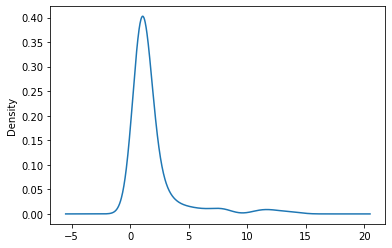

In [8]:
death_counts.plot.density()

In [9]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(law_inc_df.deaths_above_below_mean.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['deaths_above_below_mean'])
encode_df.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,deaths_above_below_mean_above_national_mean,deaths_above_below_mean_below_national_mean
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [10]:
# Merge the two DataFrames together and drop the death rate column
law_inc_df.merge(encode_df,left_index=True,right_index=True).drop("deaths_above_below_mean",1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,violent,violenth,...,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal,deaths,injuries,state_year,deaths_above_below_mean_above_national_mean,deaths_above_below_mean_below_national_mean
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,10,3,9,Alabama_2013,0.0,1.0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,1,8,8,16,Arizona_2013,0.0,1.0
2,1,1,0,1,0,0,1,0,1,1,...,1,1,1,1,99,46,139,California_2013,0.0,1.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,30,4,9,Colorado_2013,0.0,1.0
4,1,1,1,1,1,0,0,1,1,1,...,0,0,0,1,82,2,13,Connecticut_2013,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,25,18,0,Virginia_2020,0.0,1.0
369,1,1,1,1,0,0,0,0,0,0,...,0,1,0,0,55,6,8,Washington_2020,0.0,1.0
370,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,18,4,1,West Virginia_2020,0.0,1.0
371,1,1,1,1,0,1,0,0,0,0,...,0,0,0,1,23,9,0,Wisconsin_2020,0.0,1.0


In [11]:
# Generate our categorical variable list
law_cat = law_inc_df.dtypes[law_inc_df.dtypes == "object"].index.tolist()

In [12]:
# Check the number of unique values in each column
law_inc_df[law_cat].nunique()

state_year                 373
deaths_above_below_mean      2
dtype: int64

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(law_inc_df[law_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(law_cat)
encode_df.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_year_Alabama_2013,state_year_Alabama_2014,state_year_Alabama_2015,state_year_Alabama_2016,state_year_Alabama_2017,state_year_Alabama_2018,state_year_Alabama_2019,state_year_Alabama_2020,state_year_Alaska_2014,state_year_Alaska_2015,...,state_year_Wisconsin_2019,state_year_Wisconsin_2020,state_year_Wyoming_2014,state_year_Wyoming_2015,state_year_Wyoming_2016,state_year_Wyoming_2017,state_year_Wyoming_2018,state_year_Wyoming_2020,deaths_above_below_mean_above_national_mean,deaths_above_below_mean_below_national_mean
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# Merge one-hot encoded features and drop the originals
law_inc_df = law_inc_df.merge(encode_df,left_index=True, right_index=True)
law_inc_df = law_inc_df.drop(law_cat,1)
law_inc_df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,violent,violenth,...,state_year_Wisconsin_2019,state_year_Wisconsin_2020,state_year_Wyoming_2014,state_year_Wyoming_2015,state_year_Wyoming_2016,state_year_Wyoming_2017,state_year_Wyoming_2018,state_year_Wyoming_2020,deaths_above_below_mean_above_national_mean,deaths_above_below_mean_below_national_mean
0,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,1,0,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,1,1,1,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = law_inc_df["deaths"].values
X = law_inc_df.drop(["deaths"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [18]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 4096      
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 4,147
Trainable params: 4,147
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [20]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50)


Epoch 1/50
9/9 [==============================] - 1s 4ms/step - loss: -1387.9597 - accuracy: 0.0358
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: -1773.2227 - accuracy: 0.0358
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: -2250.6943 - accuracy: 0.0358
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: -3155.7021 - accuracy: 0.0358
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: -5684.3906 - accuracy: 0.0358
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: -8606.2158 - accuracy: 0.0358
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: -12716.5596 - accuracy: 0.0358
Epoch 8/50
9/9 [==============================] - 0s 2ms/step - loss: -16477.6836 - accuracy: 0.0358
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: -21418.3359 - accuracy: 0.0358
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: -27248.9238 - accuracy: 0.